![consumer_behaviour.png](consumer_behaviour.png)

# DATA-DRIVEN INSIGHTS ON USER BEHAVIOR AND AD CLICKS
***
## BUSINESS UNDERSTANDING
***

### Business Overview
In the digital age, advertising is a critical component of customer engagement and conversion. However, not all ads perform equally well, and understanding what drives user engagement is key to optimizing ad campaigns. By analyzing user demographics, behavior, and ad characteristics, businesses can tailor their strategies to maximize click-through rates (CTR) and improve return on investment (ROI).

Online advertising is a colossal business worth more than [$50 billion](https://www.researchgate.net/publication/336666758_Machine_Learning_Based_Ad-click_prediction_system), with advertisers increasingly focusing on targeted ad strategies. As the industry grows, it becomes essential to continuously measure the effectiveness of ads and refine strategies accordingly. One of the key metrics for measuring ad performance is the ad click, which indicates how often users interact with online advertisements. A higher number of ad clicks typically signifies a stronger interest in the advertised product, service, or content, making it a valuable indicator of user engagement and potential conversion.

To stay ahead of the competition and optimize ad spending, businesses like Hubspot are leveraging advanced analytics to gain deeper insights into what drives ad engagement. Techniques like A/B testing allow businesses to experiment with different ad variations (e.g., copy, images, targeting) to determine which ones produce the best results. By testing multiple versions of ads with different audience segments, businesses can identify the most effective strategies and apply them at scale, thus improving engagement rates and maximizing ad spend efficiency.

Additionally, machine learning models can be implemented to predict user behavior based on historical ad interactions and demographic data, enabling businesses to target the right audience with the most relevant ads. This combination of A/B testing and machine learning can significantly enhance ad performance, providing data-driven strategies to refine advertising efforts over time.

### Problem Statement
Affiliate Marketing Company, Hubspot seeks to further invest significant resources in online advertising to drive user engagement, awareness, and conversions. However, the challenge often lies in determining which elements of an advertisement – such as content, targeting, timing, and format – are most effective in driving user interaction

### Main Objectives
Our main objective is to determine factors influencing user interaction with online ads and identify actionable insights to optimize ad performance.

#### Specific Objectives
1. Correlation between higher ad clicks and demographic/behavioral factors
2. Investigate the variations in ad content that affect engagement
3. validation of these insights through AB testing to recommend data_driven strategies


## DATA UNDERSTANDING
***

The data utilized for this project was gotten from the [link](https://statso.io/wp-content/uploads/2023/01/ctr.zip)

The dataset contains 10,000 rows and 10 columns with the column descriptions of the data as below. The data comprises of numerical, categorical and datetime data.

| **Feature Name**            | **Description**                                                 | **Type**           | **Examples**               |
|-----------------------------|---------------------------------------------------------------|--------------------|----------------------------|
| Daily Time Spent on Site    | Time spent by a user on the site daily (in minutes)           | Continuous Numeric | 68.95, 80.23               |
| Age                         | Age of the user                                               | Continuous Numeric | 35, 23                     |
| Area Income                 | Average income of the user's geographical area (in dollars)  | Continuous Numeric | 55000, 72000               |
| Daily Internet Usage        | Daily usage of the internet by the user (in minutes)         | Continuous Numeric | 120.5, 96.8                |
| Ad Topic Line               | Topic headline of the ad viewed                              | Categorical Text   | "Top Ad Offer", "Great Deal" |
| City                        | City where the user resides                                   | Categorical Text   | "New York", "San Francisco" |
| Gender                      | Gender of the user                                            | Categorical        | Male, Female               |
| Country                     | Country of the user                                           | Categorical Text   | "USA", "India"             |
| Timestamp                   | Date and time of the ad interaction                          | DateTime           | 2024-10-31 14:53:00        |
| Clicked on Ad               | Whether the user clicked on the ad (1 = Yes, 0 = No)         | Binary Categorical | 1, 0                       |


## DATA PREPARATION
***

The following steps in summary shall be followed in the data preparation stage in preparation for Modeling in later stages

 **1. Data Loading**      
- Load the Datasets  
- Inspect the Data

 **2. Data Cleaning**
- Consistency Check
- Completeness Check
- Validity Check
- Uniformity Check
  
 **3. Feature Engineering** 
 
 **4. Exploratory Data Analysis**
- Univariate Analysis    
- Bivariate Analysis


***
#### 1. DATA LOADING 
***
The following was carried out 
1. Loading the Datasets  
2. Inspecting the Data


In [8]:
import time
import numpy as np
import pandas as pd
from classes import *
from geopy.geocoders import Nominatim
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code


# Libraries for visualizations
import folium
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

# libraries for Model Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from imblearn.over_sampling  import SMOTE


In [9]:
# Instantiate the DataLoader class
loader= DataLoader()

# Reading the csv file
data=loader.read_data("Clicked_On_AD.csv")


# Instantiate the DataInfo class
summary= DataInfo()

# Summary view of the dataset information
summary.info(data)

Shape of the dataset : (10000, 10) 

Column Names
Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object') 
 

Numerical Columns
Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad'],
      dtype='object')

Categorical Columns
Index(['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp'], dtype='object')

Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  int64  
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  obj

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


Dataset Overview


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,6/9/2016 21:43,0
1,41.73,31,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,1/16/2016 17:56,0
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,6/29/2016 10:50,0
3,59.88,28,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,6/21/2016 14:32,0
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,7/21/2016 10:54,1


***
#### 2. DATA CLEANING 
***

**2.1 Consistency Check**
***


Check for duplicates in the rows and drop any duplicated rows

In [11]:
# Instansitate the DataCheck class
data_checks = DataChecks(data)

# Checking for duplicates
data_checks.check_duplicates()

***********************************************
 Total Number of Dulpicated Rows 341
***********************************************


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
596,36.08,45,59610.81,137.24,Enhanced homogeneous moderator,Wintersfort,Male,Bosnia and Herzegovina,3/5/2016 12:03,1
4676,36.08,45,59610.81,137.24,Enhanced homogeneous moderator,Wintersfort,Male,Bosnia and Herzegovina,3/5/2016 12:03,1
2347,37.00,30,57877.15,172.83,Total 5thgeneration standardization,Kristinfurt,Female,Qatar,6/29/2016 10:50,0
3776,37.00,30,57877.15,172.83,Total 5thgeneration standardization,Kristinfurt,Female,Qatar,6/29/2016 10:50,0
1180,37.00,30,57877.15,202.61,Business-focused transitional solution,South Adamhaven,Male,Bolivia,5/8/2016 10:25,0
6334,37.00,30,57877.15,202.61,Business-focused transitional solution,South Adamhaven,Male,Bolivia,5/8/2016 10:25,0
522,38.37,32,55424.24,172.83,Focused upward-trending core,Lisafort,Female,Bahamas,4/28/2016 22:54,0
7864,38.37,32,55424.24,172.83,Focused upward-trending core,Lisafort,Female,Bahamas,4/28/2016 22:54,0
8831,38.37,32,55424.24,172.83,Focused upward-trending core,Lisafort,Female,Bahamas,4/28/2016 22:54,0
1715,38.37,32,55424.24,172.83,Focused upward-trending core,Lisafort,Female,Chile,4/28/2016 22:54,0


In [12]:
# Dropping the confirmed duplicates
data_checks.drop_duplicated()

# checking current shape of data
data.shape

(9785, 10)

**Observation**
***
- There are a total of 341 duplicated rows
- Upon confirmation of the duplicates these rows have been dropped to reduce noise
- Current dataframe has 9,785 rows and 10 columns

***
**2.2 Completeness Check**
***

Check for any missing values, or null values in the data set


In [15]:
# Checking for missing values by calling the check_missing method in the cleaning class
data_checks.check_missing()

NO NULL VALUES FOUND


**Observation**
***
- There are no missing values in the dataset


***
**2.3 Validity Check**
***
- Check for irrelevant data as well as outliers was carried out


***********************************************
Columns Containing Outliers Include: ['Age', 'Area Income']
***********************************************


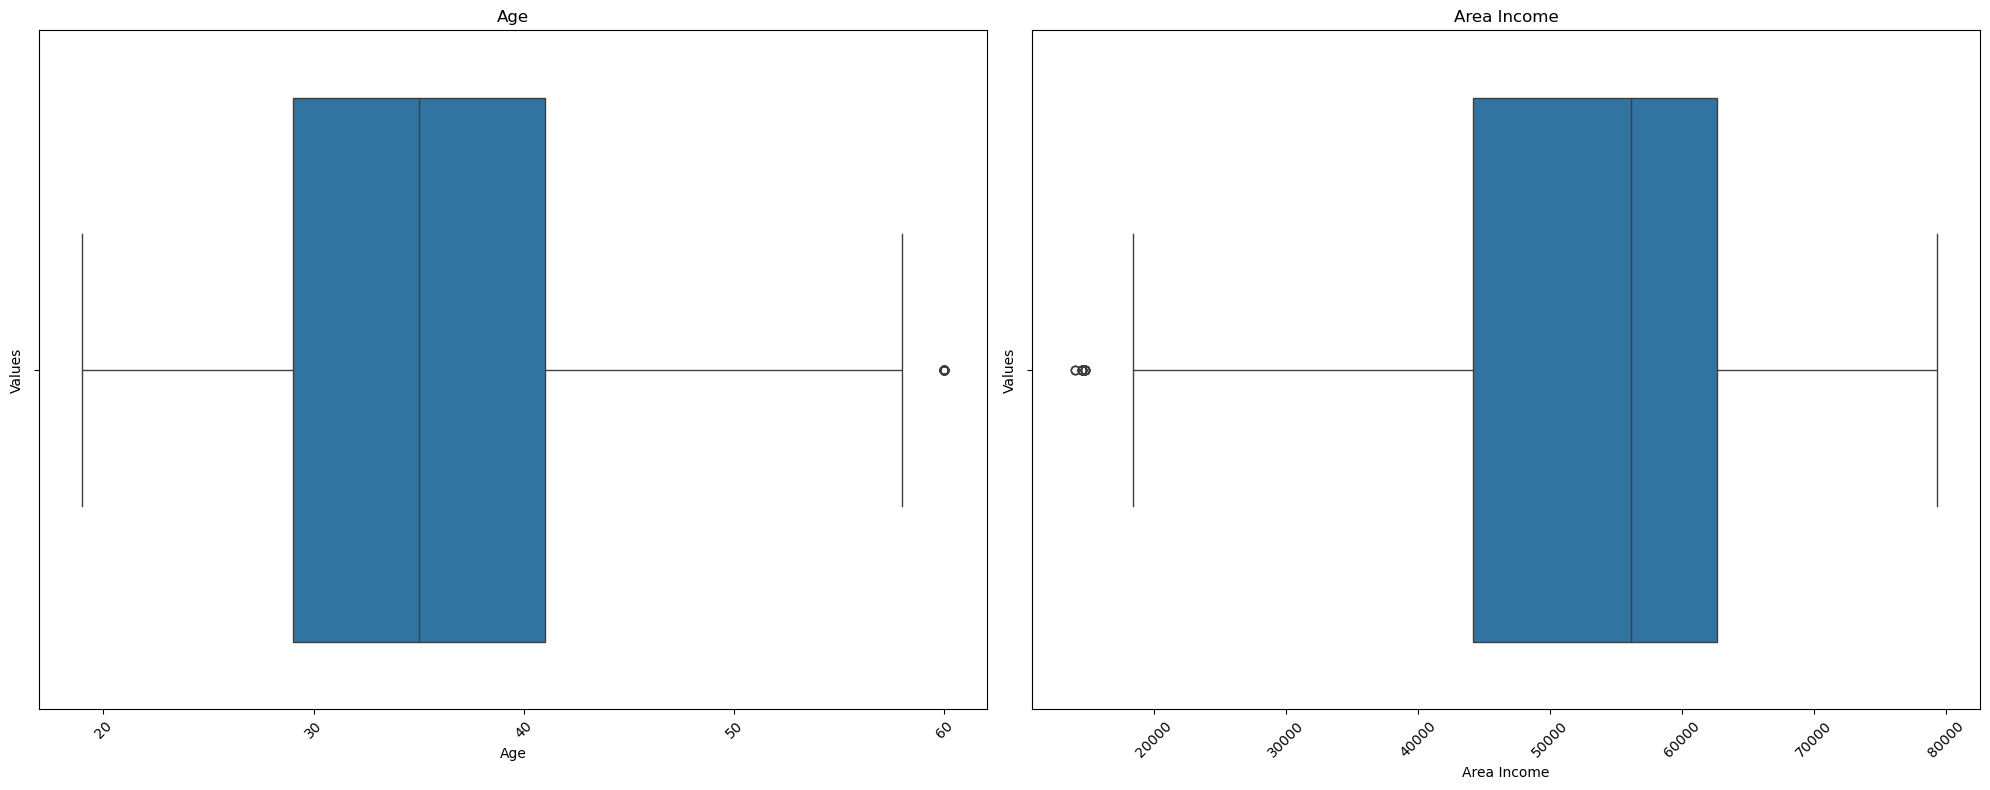

In [18]:
# Checking for outliers by calling the check_outliers_and_plot method in the cleaning class
data_checks.check_outliers_and_plot()

**Observation**
***
- The Area income is flagged as having outliers.
- However these outliers will not be dropped as it will give important information

In [20]:
# # Initialize the geolocator
# geolocator = Nominatim(user_agent="geo_validator")

# # Function to validate city-country pair
# def validate_city_country(city, country):
#     try:
#         location = geolocator.geocode(city)
#         if location and country.lower() in location.address.lower():
#             return True
#     except Exception as e:
#         print(f"Error validating {city}, {country}: {e}")
#     return False

# # Processing on the first 150 rows
 # for idx, row in data.head(150).iterrows():
#     city, country = row['City'], row['Country']
#     data.at[idx, 'Is_Valid'] = validate_city_country(city, country)

#     # Add a 1-second delay between requests
#     time.sleep(1)

#     # Print progress every 50 rows
#     if idx % 50 == 0:
#         print(f"Processed {idx + 1}/{len(data.head(150))} rows...")

# # Print the updated DataFrame
# print(" Value Counts of Valid City Names")
# print('-'*40)
# data.Is_Valid.value_counts()


In [21]:
# List of columns to drop
to_drop_list=["City"]

data.drop(columns=["City"], inplace= True)

**Observation**
***
- By using the geolocator and a sample size of 150, the city's in the city columns do not match with the country names.
- This column was hence dropped to avoid any confusion

***
**2.4 Unformity Check**
***

- Checks to ensure appropriate datatyping.
- Ensure all column names are uniform

In [24]:
# data=data_checks.convert_timestamp('Timestamp')
# data.info()

In [25]:
# Columns to convert and their corresponding new data typings
convert_dict = {
                'Timestamp': 'datetime',
                'Clicked on Ad': 'object'
                }
# Calling the convert type method to convert the listed columns above
data = data_checks.convert_typing(convert_dict)
data.info()

Column 'Timestamp' has been successfully converted to datetime.
Column 'Clicked on Ad' has been successfully converted to object.
<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  9785 non-null   float64       
 1   Age                       9785 non-null   int64         
 2   Area Income               9785 non-null   float64       
 3   Daily Internet Usage      9785 non-null   float64       
 4   Ad Topic Line             9785 non-null   object        
 5   Gender                    9785 non-null   object        
 6   Country                   9785 non-null   object        
 7   Timestamp                 9785 non-null   datetime64[ns]
 8   Clicked on Ad             9785 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 764.5+ KB


In [26]:
# Replace spaces with underscores in all column names
data.columns = data.columns.str.replace(' ', '_')

# Check the updated column names
print(data.columns)


Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Ad_Topic_Line', 'Gender', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')


**Observation**
***
- Timestamp dtype has been corrected
- All other columns have appropriate dtype
- All column names have been made uniform

In [28]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,Gender,Country,Timestamp,Clicked_on_Ad
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:00,0
1,41.73,31,61840.26,207.17,Optional full-range projection,Male,Singapore,2016-01-16 17:56:00,0
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Female,Guadeloupe,2016-06-29 10:50:00,0
3,59.88,28,56180.93,207.17,Balanced empowering success,Female,Zambia,2016-06-21 14:32:00,0
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,Female,Qatar,2016-07-21 10:54:00,1


***
#### 3. FEATURE ENGINEERING
***
To better understand the demographic distribution that the marketings strategy was able to cover, some feature engineering needs to be carried as below

- Mapping of Regions and Islands that are not found in pycountry library
- Grouping these regions and Islands according to their Parent country
- Grouping these regions according to the continent they are found in

In [30]:
#Visual view of all the Countries
# Set pandas to display all rows (be cautious with large datasets)
pd.set_option('display.max_rows', None)

# Now, print the column
print(data['Country'].value_counts())

# Reset the display setting if needed
pd.reset_option('display.max_rows')


Country
Australia                                       346
Czech Republic                                  325
Turkey                                          296
Qatar                                           222
Hong Kong                                       221
Bangladesh                                      184
Burundi                                         174
Vanuatu                                         162
Bolivia                                         160
Micronesia                                      159
Algeria                                         155
Senegal                                         153
Luxembourg                                      146
Croatia                                         143
Gabon                                           135
Uganda                                          133
Western Sahara                                  130
Singapore                                       130
Myanmar                                         129
Nami

In [31]:
# Define parent country mappings for islands and other regions
island_parent_mapping = {
    'Svalbard & Jan Mayen Islands': 'Norway',
    'Northern Mariana Islands': 'United States of America',
    'French Polynesia': 'France',
    'Pitcairn Islands': 'United Kingdom',
    'Bouvet Island (Bouvetoya)': 'Norway',
    'South Georgia and the South Sandwich Islands': 'United Kingdom',
    'Timor-Leste':'East Timor',
    'Palestinian Territory':'Palestine',
    'Libyan Arab Jamahiriya':"Libya",
    'Korea':"South Korea",
    "Cote d'Ivoire":"Ivory Coast",
    'United States Minor Outlying Islands': 'United States of America',
    'Netherlands Antilles':'Netherlands',
    'French Southern Territories':'France',
    'Saint Helena':'United Kingdom',
    'Saint Barthelemy':'France',
    'Reunion':'France'
}

# Define continent codes
continent_map = {
    'AF': 'Africa',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'SA': 'South America',
    'OC': 'Oceania',
    'AN': 'Antarctica'
}

# Define custom mappings for regions and islands
custom_mappings = {
    'Svalbard & Jan Mayen Islands': 'Europe',
    'Northern Mariana Islands': 'Oceania',
    'Western Sahara': 'Africa',
    'French Polynesia': 'Oceania',
    'Pitcairn Islands': 'Oceania',
    'South Georgia and the South Sandwich Islands': 'Antarctica',
    'Bouvet Island (Bouvetoya)': 'Antarctica',
    'Timor-Leste':'Asia',
    'Palestinian Territory':'Asia',
    'Libyan Arab Jamahiriya':"Africa",
    'Korea':"Asia",
    "Cote d'Ivoire": "Africa",
    'United States Minor Outlying Islands': 'North America',
    'Netherlands Antilles':'North America',
    'French Southern Territories':'Antarctica',
    'Saint Helena':'Africa',
    'Saint Barthelemy':'North America',
    'Reunion':'Africa'
}


In [32]:
# Function to map country to continent
def get_continent(country_name):
    try:
        # Get the ISO alpha-2 code for the country
        country_code = country_name_to_country_alpha2(country_name)
        # Get the continent code for the country code
        continent_code = country_alpha2_to_continent_code(country_code)
        # Map the continent code to its name
        return continent_map[continent_code]
    except Exception:
        return 'Unknown'

# Function to apply custom mappings
def map_custom_country(country_name):
    return custom_mappings.get(country_name, get_continent(country_name))

# Function to map islands to their parent countries
def get_parent_country(country_name):
    return island_parent_mapping.get(country_name, country_name)

# Add continent and parent country columns
data['Continent'] = data['Country'].apply(map_custom_country)
data['Parent_Country'] = data['Country'].apply(get_parent_country)

# Validate and visualize results
print("Unmapped Regions:", data[data['Continent'] == 'Unknown']['Country'].unique())
data.head(10)

Unmapped Regions: []


,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,Gender,Country,Timestamp,Clicked_on_Ad,Continent,Parent_Country
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:00,0,Europe,Norway
1,41.73,31,61840.26,207.17,Optional full-range projection,Male,Singapore,2016-01-16 17:56:00,0,Asia,Singapore
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Female,Guadeloupe,2016-06-29 10:50:00,0,North America,Guadeloupe
3,59.88,28,56180.93,207.17,Balanced empowering success,Female,Zambia,2016-06-21 14:32:00,0,Africa,Zambia
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,Female,Qatar,2016-07-21 10:54:00,1,Asia,Qatar
5,51.30,26,51463.17,131.68,Focused multi-state workforce,Female,Cameroon,2016-05-15 13:18:00,0,Africa,Cameroon
6,66.08,43,73538.09,136.40,Optimized upward-trending productivity,Male,Turkey,2016-04-03 21:13:00,1,Asia,Turkey
7,36.08,26,74903.41,228.78,Programmable uniform website,Male,French Guiana,2016-03-11 06:49:00,0,South America,French Guiana
8,46.14,33,43974.49,196.77,Customizable tangible hierarchy,Male,Vanuatu,2016-03-24 06:36:00,0,Oceania,Vanuatu
9,51.65,51,74535.94,188.56,Function-based incremental standardization,Female,Cameroon,2016-01-31 05:12:00,0,Africa,Cameroon


**Observation**
***
- Multiple regions and islands have been correctly mapped
- Some regions such as Guadalope still retains their name as Parent country name despite being a territory
- Dataset contains 9785 rows and 11 columns now
  

***
#### 4. Exploratory Data Analysis
***

**3.1 Univariate Analysis**

This section examines the distribution of key features in the dataset:

- Demographic Variables: Distribution of age and gender.
- Geographic Variables: Distribution of data across continents and countries.
- User Behavior: Analysis of Clicked_on_Ad responses.
- Continuous Features: Distribution of Daily_Time_Spent_on_Site, Area_Income, and Daily_Internet_Usage.


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_univariate_distribution(df, listed):
    # Create an empty list to hold statistics
    statistics_list = []
    
    plt.figure(figsize=(15, 10))
    
    # Flag to check if there are any numerical columns
    numerical_columns_found = False
    
    for i, column in enumerate(listed):
        plt.subplot(1, len(listed), i + 1)
        
        # Initialize a dictionary to store statistics for each column
        column_stats = {'Column': column}
        
        if df[column].dtype == "int64" or df[column].dtype == "float64":
            numerical_columns_found = True
            # For numerical columns, plot histogram and calculate statistics
            column_stats['Mean'] = df[column].mean()
            column_stats['Max'] = df[column].max()
            column_stats['Min'] = df[column].min()
            
            sns.histplot(df[column], kde=True, color='blue')
            plt.title("Distribution of " + column)
            plt.xlabel(column)
            plt.ylabel("Frequency")

            # Append the statistics for this column to the list
            statistics_list.append(column_stats)
        
        elif df[column].dtype == "object":
            # For categorical columns, plot count plot with percentages
            value_counts = df[column].value_counts(normalize=True) * 100  # Normalize to get percentages
            sns.barplot(
                x=value_counts.index, 
                y=value_counts.values, 
                hue=value_counts.index, 
                palette="viridis",
            )
            plt.title("Distribution of " + column)
            plt.xlabel(column)
            plt.ylabel("Percentage")
            plt.xticks(rotation=45)
            
            # Annotate bars with percentages
            for index, value in enumerate(value_counts.values):
                plt.text(index, value + 0.25, f"{value:.1f}%", ha="center", va="bottom")
    
    # Create the statistics DataFrame only if there are numerical columns
    if numerical_columns_found:
        statistics_df = pd.DataFrame(statistics_list).set_index("Column")
    else:
        # If no numerical columns, create an empty DataFrame
        statistics_df = pd.DataFrame(columns=["Column", "Mean", "Max", "Min"]).set_index("Column")
    
    # Display the DataFrame with statistics
    display(statistics_df)
    
    plt.tight_layout()
    plt.show()

,Mean,Max,Min
Column,,,
Age,35.83955,60,19


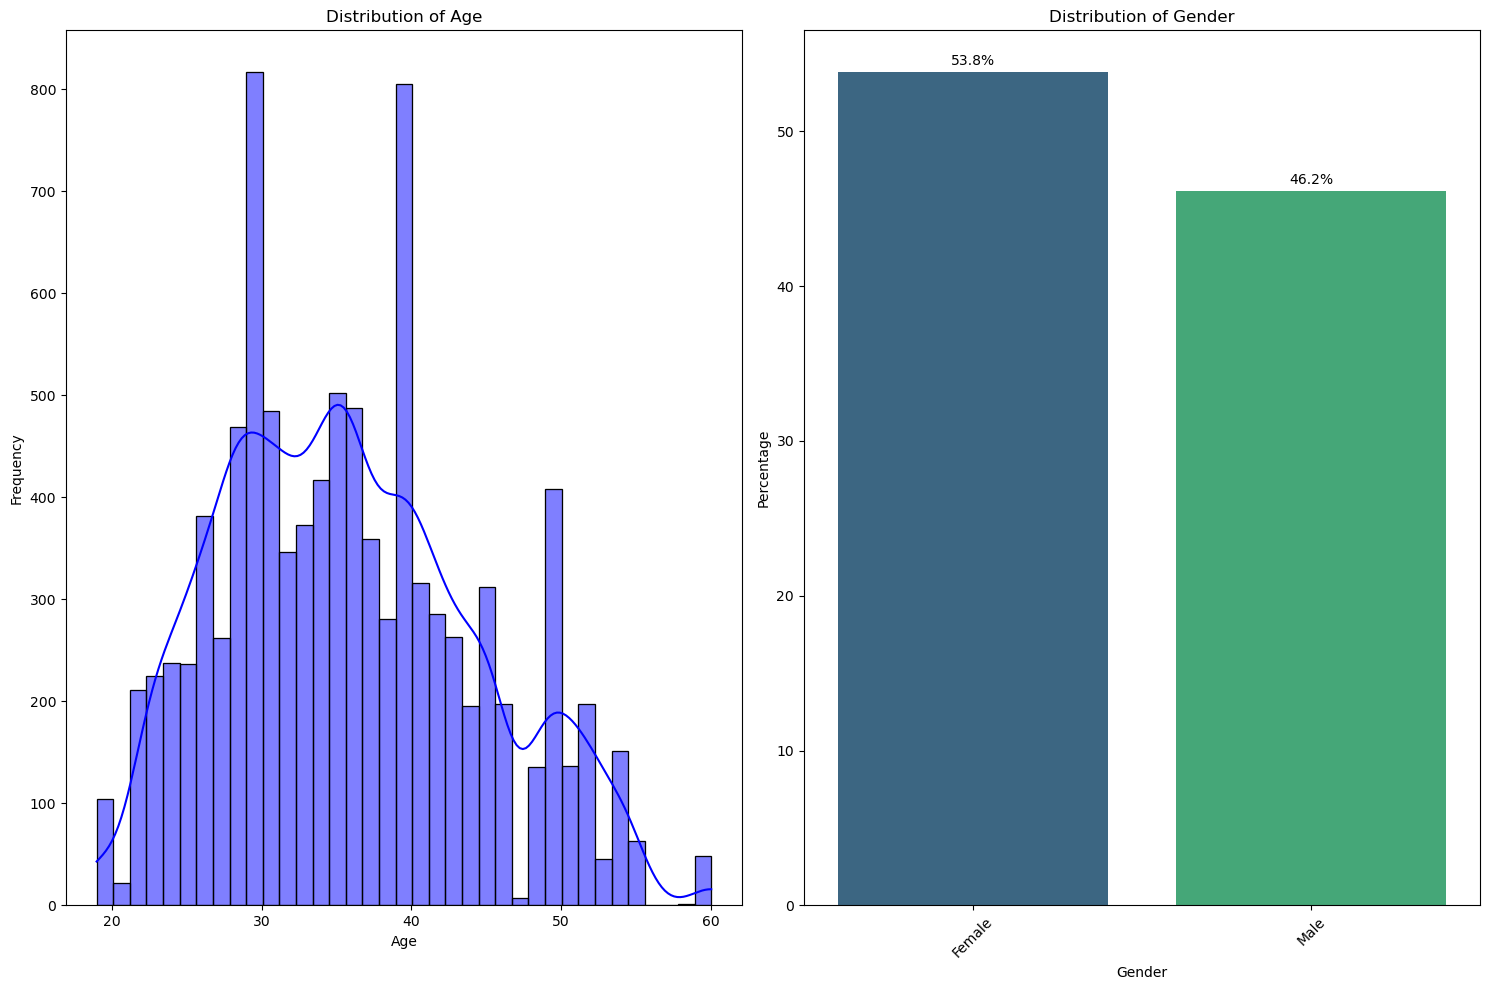

In [39]:
# Demographic Information
listed=["Age", "Gender"]

# Plotting to understand demographic information
plot_univariate_distribution(data, listed)

**Observation**
***
- The average age of the population that viewed the ad was 35.8 years, with the youngest at 19 and oldest at 60
- The majority of the viewers are female at 53.8%

,Mean,Max,Min
Column,,,


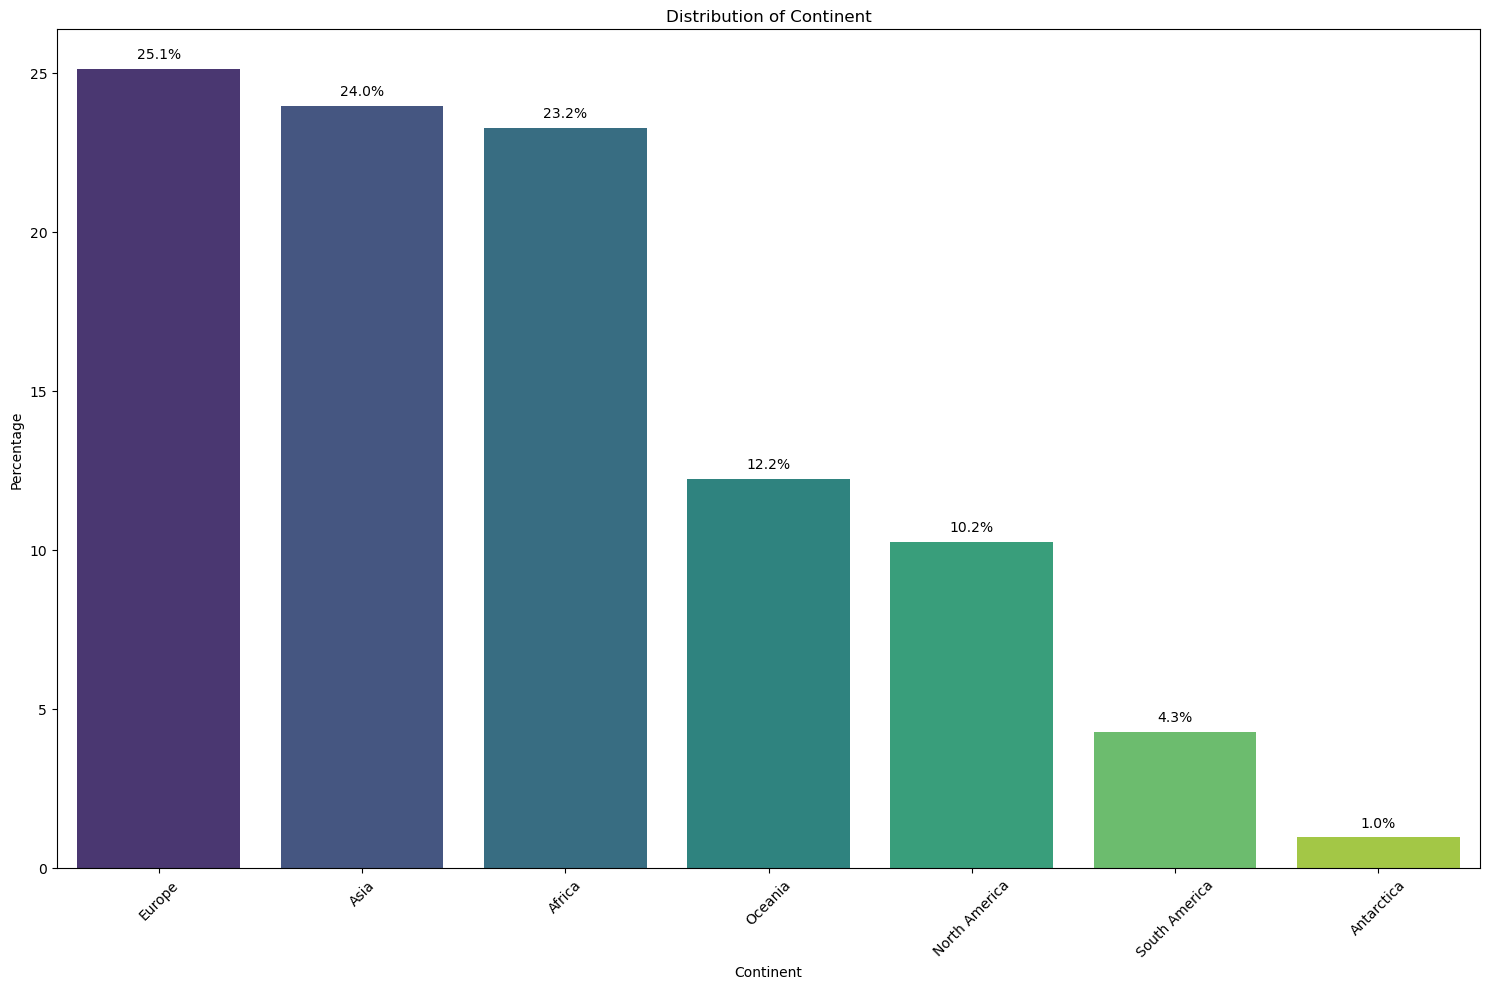

In [42]:
# Regional Information
listed = ['Continent']

# Plotting to understand regional distribution
plot_univariate_distribution(data, listed)


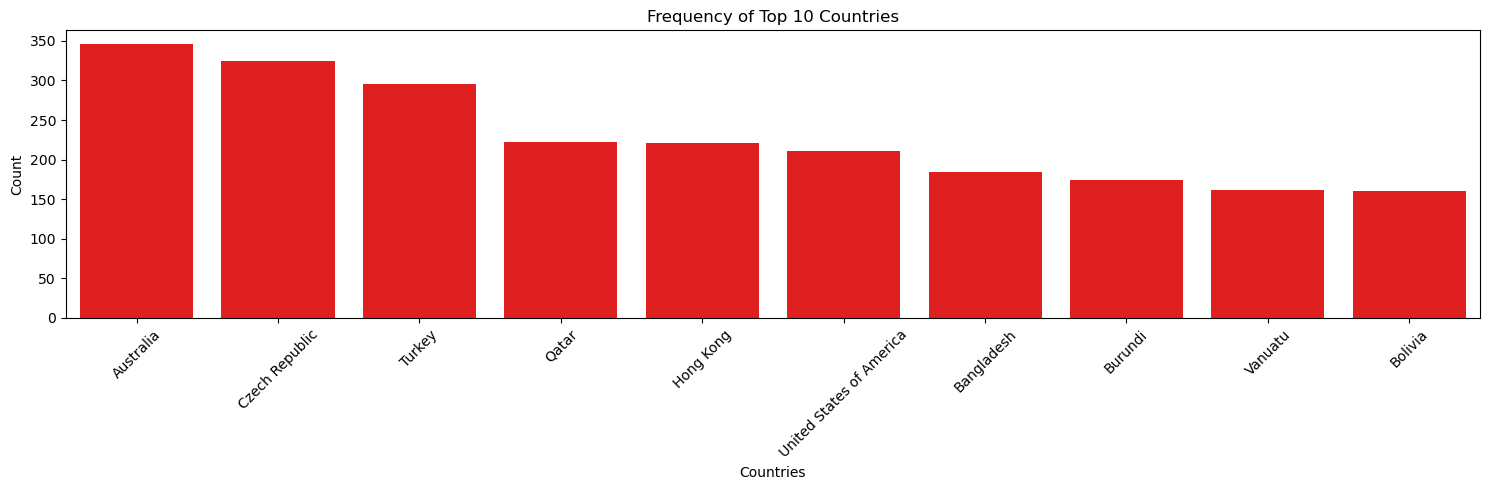

In [43]:
# Filtering to get the top 10 coutries that were exposed to the AD
top_10_countries= data["Parent_Country"].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(15,5))

# Create a barplot for the top 10 countries
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, color='red')

# Set the title and labels
plt.title("Frequency of Top 10 Countries")
plt.xlabel("Countries")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Observation**
***
- The AD coverage was mainly in Europe, Asia and Africa
- THe top 3 countries that viewed the AD were  Australia, Czech Republic  and Turkey

,Mean,Max,Min
Column,,,


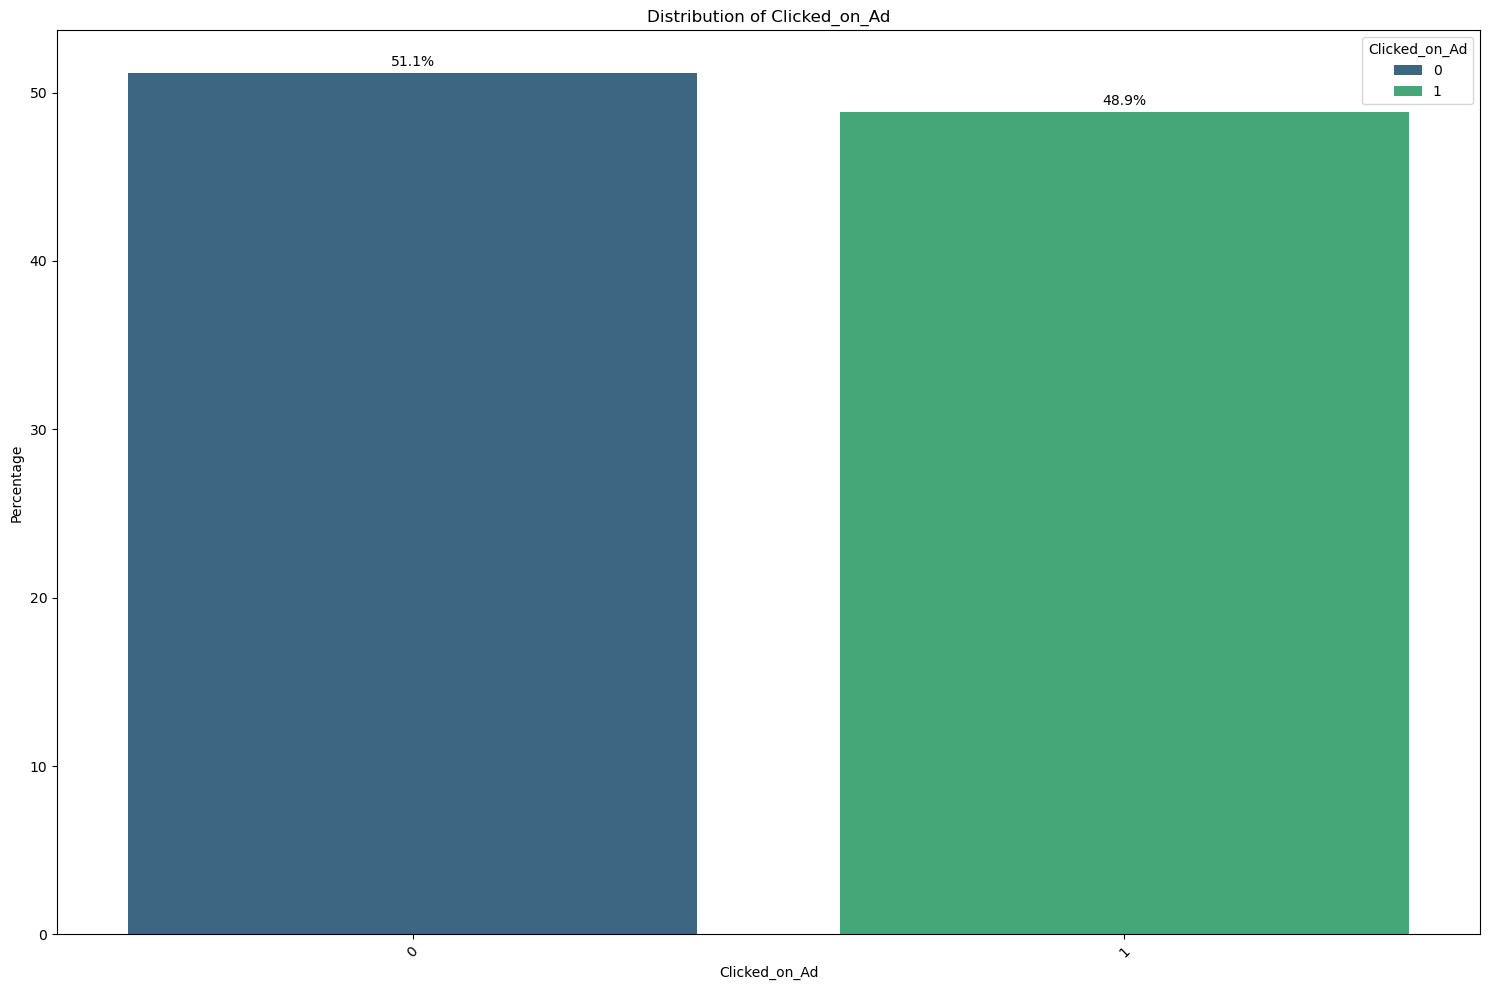

In [46]:
# Plotting to understand the frequency of those who clicked on the AD(1) and those who did not (0)
listed = ['Clicked_on_Ad']

plot_univariate_distribution(data, listed)


**Observation**
***
- The number of people who clicked and did not click on the AD are almost even at 51.1% who did not click and 48.9% who clicked.

,Mean,Max,Min
Column,,,
Daily_Time_Spent_on_Site,61.601379,90.97,32.60
Daily_Internet_Usage,177.886144,269.96,105.22
Area_Income,53948.143348,79332.33,13996.50


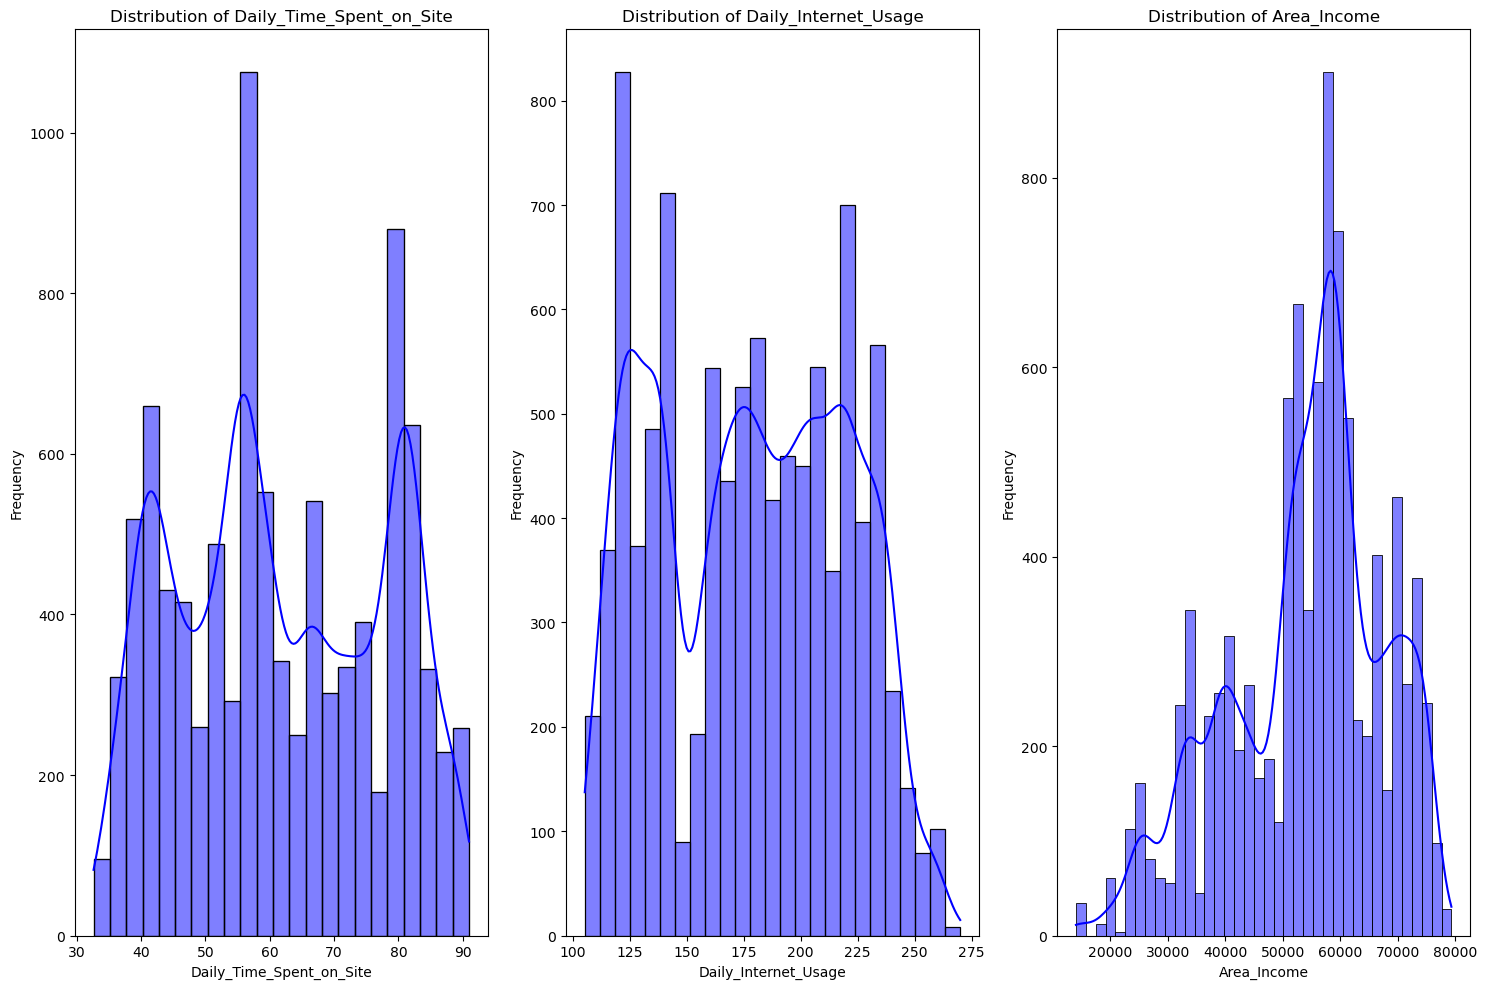

In [76]:
# List of distribution of income and internet usage
listed=['Daily_Time_Spent_on_Site','Daily_Internet_Usage','Area_Income']

# Calling the function to plot
plot_univariate_distribution(data, listed)

**Observation**
***

- Average Internet Usage for the population is 177 minutes
- Average time spent on the website is 61 minutes. Should explore to see correlation between this and clicking on the AD
- Average area income is 53,948 which shows a higher average than the [global average income](https://www.zippia.com/advice/average-income-worldwide/#:~:text=Today%2C%20the%20average%20global%20income,it's%20a%20huge%20relative%20increase.)
- 

In [ ]:
Null Hypothesis (H₀): There is no difference between groups (e.g., gender or time spent on-site) in terms of ad clicks.
Alternative Hypothesis (H₁): There is a statistically significant difference between groups.

In [ ]:
Segment the Data
Create groups for comparison:

Group A: Users who meet one criterion (e.g., low daily time spent on the site).
Group B: Users who meet the other criterion (e.g., high daily time spent on the site).
For example:

Split users into age groups (e.g., below 30 vs. 30 and above).
Compare users by daily time spent on-site (e.g., <60 minutes vs. ≥60 minutes).


In [ ]:
3. Choose a Metric
Define the metric you want to measure, such as:

Click Rate: Percentage of users who clicked on ads.
Time Spent: Average time spent on-site for each group.

In [ ]:
erform the Test
Perform statistical tests to compare groups:

T-Test or Z-Test: For continuous variables like daily time spent on-site.
Chi-Square Test: For categorical variables like gender or city.
Mann-Whitney U Test: If the data is not normally distributed.

In [ ]:
 Analyze the Results
Check the p-value to determine significance (e.g., p < 0.05).
If the null hypothesis is rejected, conclude that there is a statistically significant difference.

In [ ]:
Example Analysis: Daily Time Spent on Site and Ad Clicks
If you want to test whether users who spend more time on the site are more likely to click ads:

Divide users into two groups:
Group A: Users with daily time ≤ the median.
Group B: Users with daily time > the median.
Calculate the click rates for both groups.
Perform a statistical test to compare the two groups.


In [ ]:
data.columns